In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Act = pd.read_csv("atusact_0323.dat")
Resp=pd.read_csv("atusresp_0323.dat")
Raster=pd.read_csv("atusrost_0323.dat")

In [4]:
Resp.columns.unique()

Index(['TUCASEID', 'TULINENO', 'TESPUHRS', 'TRDTIND1', 'TRDTOCC1', 'TRERNHLY',
       'TRERNUPD', 'TRHERNAL', 'TRHHCHILD', 'TRIMIND1',
       ...
       'TRWBMODR', 'TRTALONE_WK', 'TRTCCC_WK', 'TRLVMODR', 'TRTEC', 'TUECYTD',
       'TUELDER', 'TUELFREQ', 'TUELNUM', 'TU20FWGT'],
      dtype='object', length=133)

In [5]:
#TRSPPRES. Presence of the respondent's spouse or unmarried partner in the household. This variable appears on the Respondent File and the Activity Summary File.
#TELFS labor status 
#TEHRUSL1:Usual weekly hours at the main job, since more working hours could reduce free time available to spend alone.
#TRTFAMILY (Respondent File): Total time spent with family members,
respondent_vars = ['TUCASEID', 'TRTALONE', 'TRNUMHOU', 'TRSPPRES', 'TELFS', 'TEHRUSL1', 'TRTHH', 'TRTFAMILY']
roster_vars = ['TUCASEID', 'TEAGE', 'TESEX']

### Information about TELFS

The variable **TELFS** (Labor Force Status) is found in the **Respondent File** and the **Activity Summary File** and applies to all respondents. The valid entries for **TELFS** are:

*   1 Employed - at work 
*   2 Employed - absent 
*   3 Unemployed - on layoff
*   4 Unemployed - looking 
*   5 Not in labor force 

**TELFS** is used to define the **edited universe** for several other variables.  The edited universe identifies the group of survey respondents for whom a variable is defined. For example, **TEIO1OCD** (occupation code for the respondent's main job) is only defined for respondents who are employed.  So the edited universe for **TEIO1OCD** is **TELFS = 1 or 2.** 

The sources also provide examples illustrating how **TELFS** is used in a simplified version of the **Respondent File**. The simplified file contains five respondents, each with a corresponding **TELFS** value. For example, one respondent has a **TELFS** value of 5, indicating they are not in the labor force. 


In [6]:
# Subset the data to the variables of interest
respondent_subset = Resp[respondent_vars]
roster_subset = Raster[roster_vars]

In [7]:
# Merge the files on the ID column
merged_df = pd.merge(respondent_subset, roster_subset, on='TUCASEID', how='inner')

In [8]:
# I am investigating only for the adults 
adults_df = merged_df[merged_df['TEAGE'] >= 18]

In [9]:
sampled_df = adults_df.sample(n=1000, random_state=42)  # random_state for reproducibility


In [13]:
final_df = sampled_df.drop_duplicates(subset='TUCASEID')


/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_37434/1659834549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['log_TRTALONE'] = np.log(final_df['TRTALONE']+1)  # Adding 1 to avoid log(0)


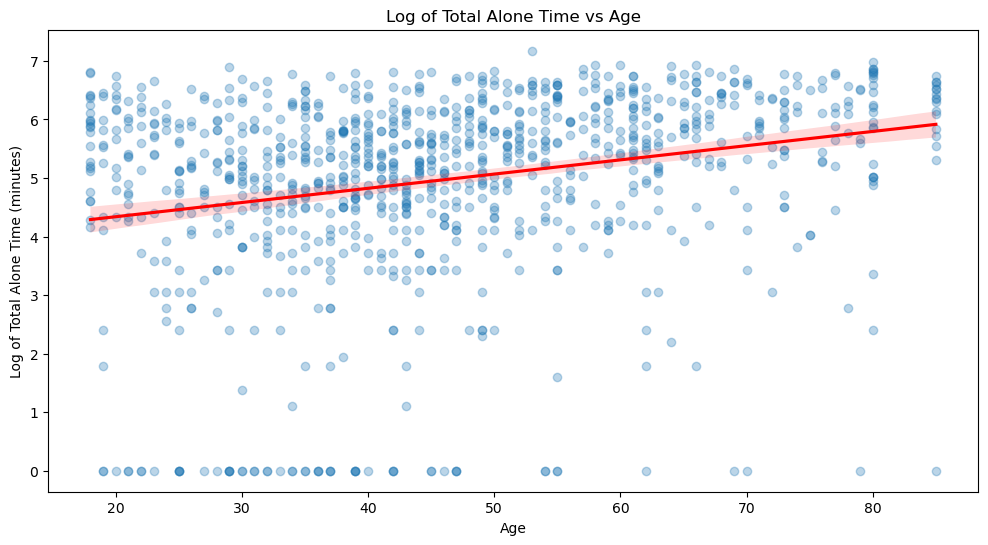

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [49]:
# Log-transform the TRTALONE variable
final_df['log_TRTALONE'] = np.log(final_df['TRTALONE']+1)  # Adding 1 to avoid log(0)

plt.figure(figsize=(12, 6))

# Plot log-transformed Total Alone Time vs Age with regression line
sns.regplot(data=final_df, x='TEAGE', y='log_TRTALONE', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Log of Total Alone Time vs Age')
plt.xlabel('Age')
plt.ylabel('Log of Total Alone Time (minutes)')
plt.show()
plt.figure(figsize=(12, 6))




#log 

In [50]:
# Plot log total alone time vs household size with regression line


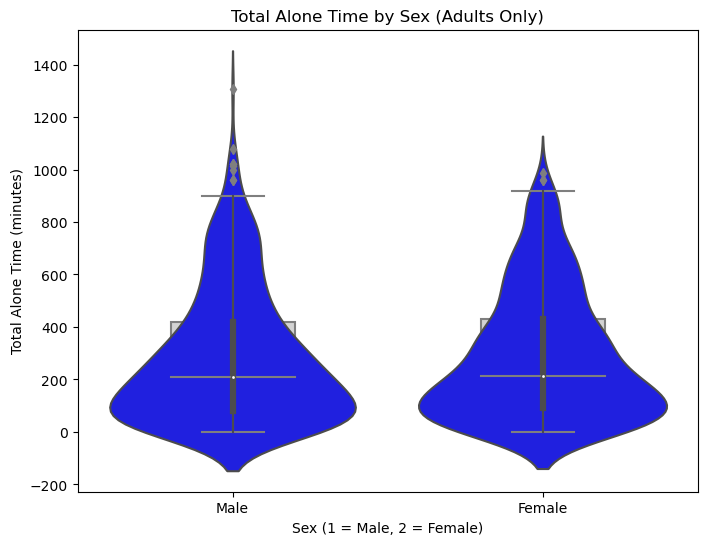

In [14]:
# boxplot for TRTALONE by TESEX
plt.figure(figsize=(8, 6))

sns.boxplot(data=final_df, x='TESEX', y='TRTALONE', color='lightgray', width=0.4)

# Overlay a violin plot
sns.violinplot(data=final_df, x='TESEX', y='TRTALONE', color='blue', alpha=0.5)

plt.title('Total Alone Time by Sex (Adults Only)')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Total Alone Time (minutes)')
plt.xticks([0, 1], ['Male', 'Female'])  

plt.show()

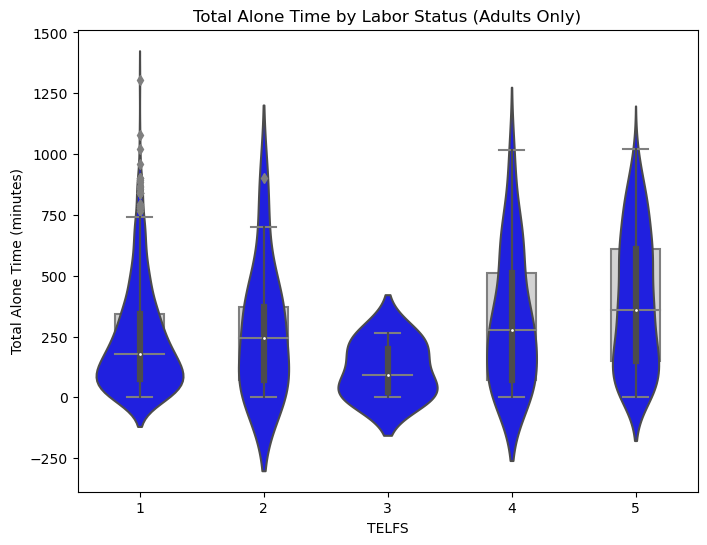

In [15]:
# boxplot for Total Alone Time by Labor Status (Adults Only)'
plt.figure(figsize=(8, 6))

# Create a boxplot
sns.boxplot(data=final_df, x='TELFS', y='TRTALONE', color='lightgray', width=0.4)

# Overlay a violin plot
sns.violinplot(data=final_df, x='TELFS', y='TRTALONE', color='blue', alpha=0.5)

# Customizing the plot
plt.title('Total Alone Time by Labor Status (Adults Only)')
plt.ylabel('Total Alone Time (minutes)')  # Setting labels for clarity

plt.show()

In [40]:
# List of the predictor columns 

predictor_cols = ['TRNUMHOU', 'TRSPPRES', 'TELFS', 'TEHRUSL1', 'TRTHH', 'TRTFAMILY', 'TEAGE', 'TESEX']

#  Df to store summary statistics
summary_stats = pd.DataFrame(columns=['Predictor', 'Mean', 'Median', 'Standard Deviation'])

# Calculate descriptive statistics for each predictor
for predictor in predictor_cols:
    stats = final_df.groupby(predictor)['TRTALONE'].agg(['mean', 'median', 'std']).reset_index()
    
    # Store the overall statistics in a new row for summary
    overall_stats = {
        'Predictor': predictor,
        'Mean': stats['mean'].mean(),
        'Median': stats['median'].median(),
        'Standard Deviation': stats['std'].mean() 
         
    }
    
    summary_stats = summary_stats.append(overall_stats, ignore_index=True)



/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_37434/1265288149.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append(overall_stats, ignore_index=True)
/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_37434/1265288149.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append(overall_stats, ignore_index=True)
/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_37434/1265288149.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append(overall_stats, ignore_index=True)
/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_37434/1265288149.py:20: FutureWarning: The frame.append method is deprecat

In [41]:
summary_stats

,Predictor,Mean,Median,Standard Deviation
0,TRNUMHOU,236.526047,153.00,214.183429
1,TRSPPRES,272.968905,180.00,228.850989
2,TELFS,266.299871,242.50,228.217393
3,TEHRUSL1,240.880685,191.25,197.419414
4,TRTHH,155.522603,112.00,119.209104
5,TRTFAMILY,219.696311,176.00,141.474225
6,TEAGE,307.732405,231.00,233.691162
7,TESEX,285.312748,212.00,248.624098


In [42]:
#check for the correlation between the predictors 
# Select only the predictor columns
predictor_cols = ['TRNUMHOU', 'TRSPPRES', 'TELFS', 'TEHRUSL1', 'TRTHH', 'TRTFAMILY', 'TEAGE', 'TESEX']

# Calculate the correlation matrix for the predictor variables
correlation_matrix = df[predictor_cols].corr()



In [43]:
correlation_matrix 

,TRNUMHOU,TRSPPRES,TELFS,TEHRUSL1,TRTHH,TRTFAMILY,TEAGE,TESEX
TRNUMHOU,1.000000,-0.192303,-0.088721,0.061660,0.393996,0.292783,-0.410233,-0.033114
TRSPPRES,-0.192303,1.000000,0.155355,-0.196676,-0.227506,-0.429222,0.000516,0.071994
TELFS,-0.088721,0.155355,1.000000,-0.813738,-0.033406,0.085492,0.326967,0.024854
TEHRUSL1,0.061660,-0.196676,-0.813738,1.000000,0.037828,-0.105648,-0.309012,-0.061313
TRTHH,0.393996,-0.227506,-0.033406,0.037828,1.000000,0.475872,-0.235863,-0.003460
TRTFAMILY,0.292783,-0.429222,0.085492,-0.105648,0.475872,1.000000,-0.084930,0.026003
TEAGE,-0.410233,0.000516,0.326967,-0.309012,-0.235863,-0.084930,1.000000,-0.021293
TESEX,-0.033114,0.071994,0.024854,-0.061313,-0.003460,0.026003,-0.021293,1.000000


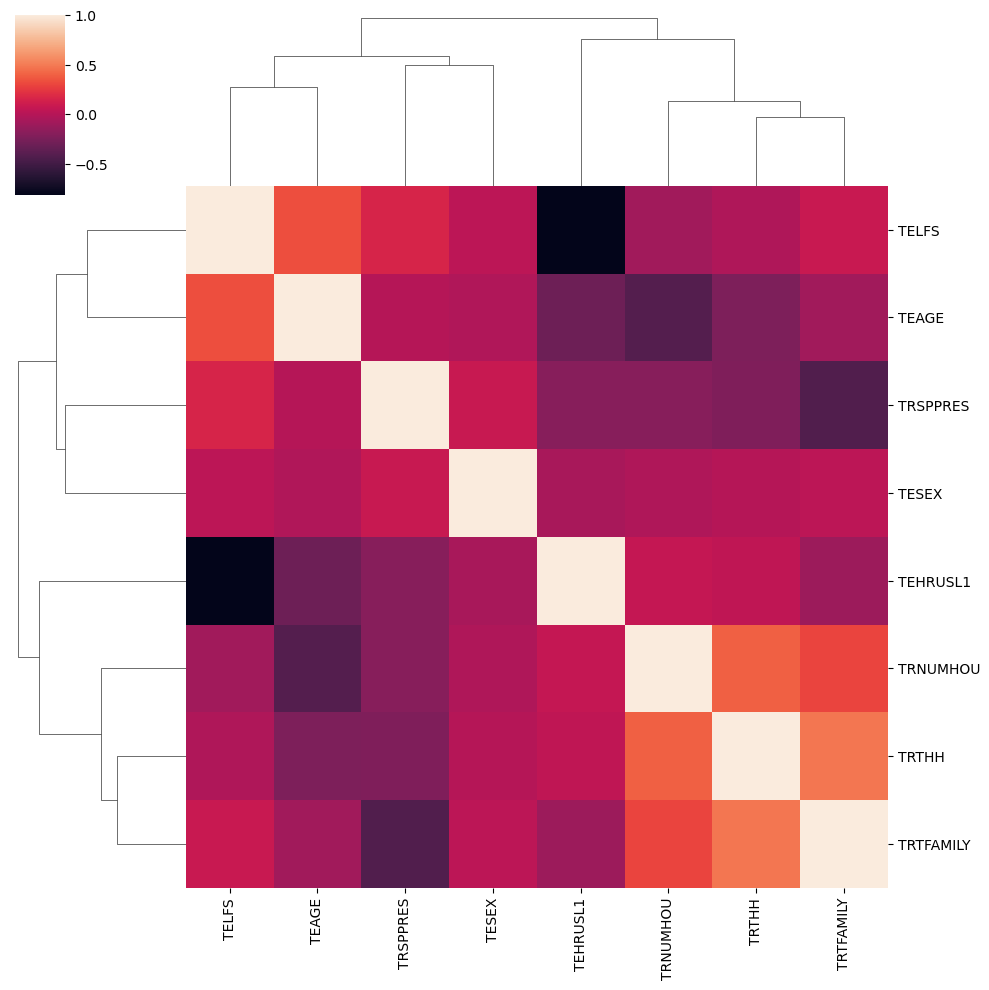

In [44]:
sns.clustermap(correlation_matrix )